In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
plt.style.use('fivethirtyeight')

## Collecting the data:

In [69]:
rating_conv = json.load(open('../data_coll/rating_conv.json'))
rev_rating_conv = json.load(open('../data_coll/rev_rating_conv.json'))
routes = pd.read_csv('../data/routes.csv')
users = pd.read_csv('../data/user_ticks.csv', delimiter='|')
climbs = users.merge(routes, how='left', left_on='route_id', right_on='route_id')

In [432]:
routes.head(3)

,route_id,name,type,rating,stars,star_votes,pitches,location,longitude,latitude,base_rating,num_rating
0,105806397,The Grand Wall,"Trad, Aid",5.11a A0,4.9,324,9.0,"['International', 'North America', 'Canada', '...",-123.1480,49.6822,5.11a,11.2
1,105806955,Exasperator,Trad,5.10c,5.0,450,2.0,"['International', 'North America', 'Canada', '...",-123.1481,49.6823,5.10c,10.6
2,105947052,Klahanie Crack,Trad,5.7,4.7,465,1.0,"['International', 'North America', 'Canada', '...",-123.1578,49.6696,5.7,7.0


In [433]:
users.head(3)

,route_id,date,pitches,notes,style,lead_style,tick_id,user_stars,user_rating,user_id
0,106002151,2019-11-02,1.0,NaN,TR,NaN,118003759,NaN,NaN,200527767
1,106241707,2019-11-02,1.0,NaN,TR,NaN,118003758,NaN,NaN,200527767
2,106589615,2019-11-02,1.0,NaN,Lead,NaN,118003757,NaN,NaN,200527767


## Exploration of the `routes` dataframe:

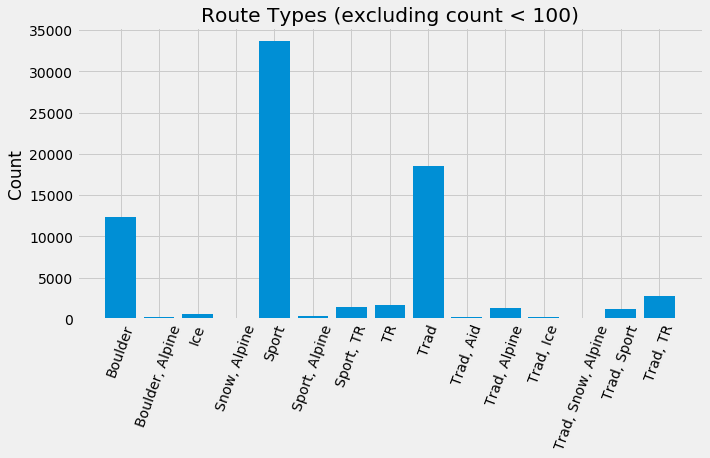

In [442]:
route_types = routes.groupby('type').count()['route_id']
route_types = route_types[route_types > 100]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(route_types.index,route_types.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Route Types (excluding count < 100)');

plt.savefig('./images/route_types.png', bbox_inches='tight')

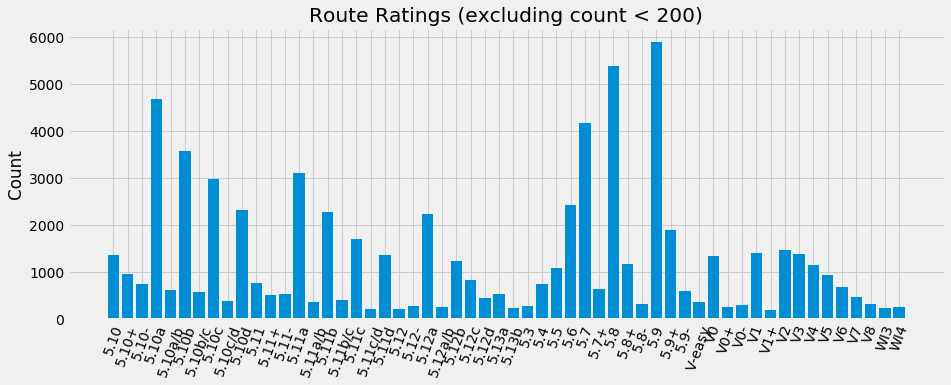

In [443]:
route_ratings = routes.groupby('base_rating').count()['route_id']
route_ratings = route_ratings[route_ratings > 200]

fig, ax = plt.subplots(figsize=(14,5))
ax.bar(route_ratings.index,route_ratings.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Route Ratings (excluding count < 200)');

plt.savefig('./images/route_ratings_bar.png', bbox_inches='tight')

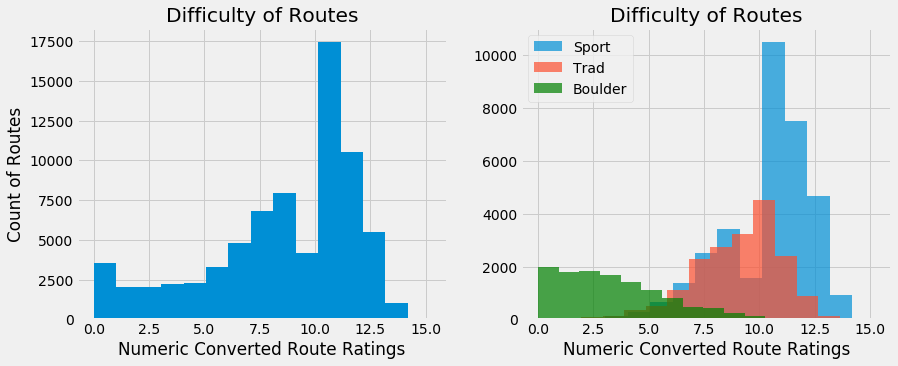

In [445]:
routes_no_nan = routes[
    (routes['base_rating'].str.startswith('5', na=False))
    | (routes['base_rating'].str.startswith('V', na=False))]
sport_ratings = routes_no_nan[routes_no_nan['type'] == 'Sport']['num_rating']
trad_ratings = routes_no_nan[routes_no_nan['type'] == 'Trad']['num_rating']
boulder_ratings = routes_no_nan[routes_no_nan['type'] == 'Boulder']['num_rating']

bins = 15
alpha = .7
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].hist(routes_no_nan['num_rating'], bins=bins);
ax[0].set_title('Difficulty of Routes');
ax[0].set_ylabel('Count of Routes');
ax[0].set_xlabel('Numeric Converted Route Ratings');

ax[1].hist(sport_ratings, bins=bins, alpha=alpha);
ax[1].hist(trad_ratings, bins=bins, alpha=alpha);
ax[1].hist(boulder_ratings, bins=bins, alpha=alpha, color='g');
ax[1].set_title('Difficulty of Routes');
ax[1].set_xlabel('Numeric Converted Route Ratings');
ax[1].legend(['Sport','Trad','Boulder'],loc='upper left');

plt.savefig('./images/route_difficulty.png', bbox_inches='tight')

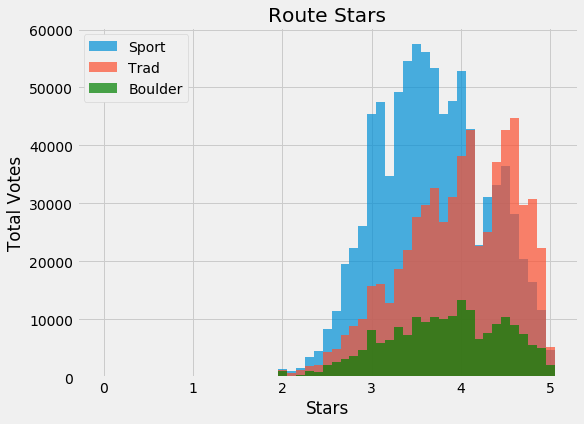

In [446]:
trad_stars = routes[routes['type'] == 'Trad'].groupby('stars').sum()['star_votes']
sport_stars = routes[routes['type'] == 'Sport'].groupby('stars').sum()['star_votes']
boulder_stars = routes[routes['type'] == 'Boulder'].groupby('stars').sum()['star_votes']

width = .1
alpha = .7
linewidth = 2
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(sport_stars.index, sport_stars.values, width=width, alpha=alpha, label='Sport');
ax.bar(trad_stars.index, trad_stars.values, width=width, alpha=alpha, label='Trad');
ax.bar(boulder_stars.index,boulder_stars.values,width=width,alpha=alpha,color='g',label='Boulder')
ax.set_ylabel('Total Votes');
ax.set_xlabel('Stars')
ax.set_title('Route Stars');
ax.legend(loc='upper left', framealpha=1);

plt.savefig('./images/route_stars.png', bbox_inches='tight')

## Exploration of the `routes` dataframe:

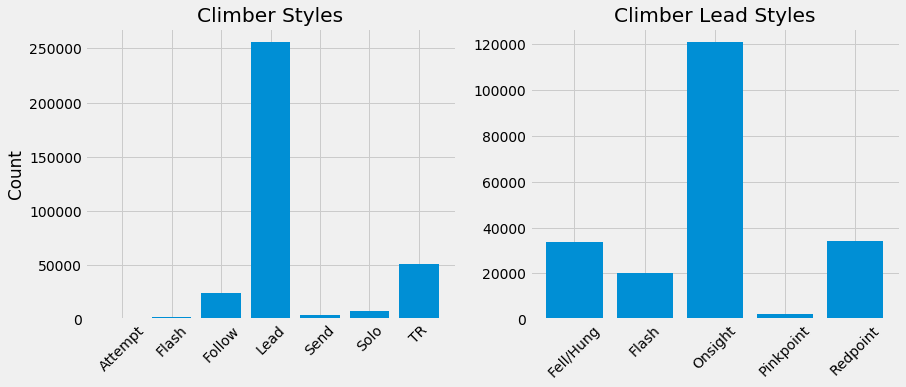

In [447]:
user_styles = users.groupby('style').count()['user_id']

fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].bar(user_styles.index,user_styles.values);
ax[0].tick_params('x',labelrotation=45)
ax[0].set_ylabel('Count');
ax[0].set_title('Climber Styles');
ax[1].bar(user_lead_styles.index,user_lead_styles.values);
ax[1].tick_params('x',labelrotation=45)
ax[1].set_title('Climber Lead Styles');

plt.savefig('./images/climber_styles.png', bbox_inches='tight')

## Exploration of combined `climbs` data:

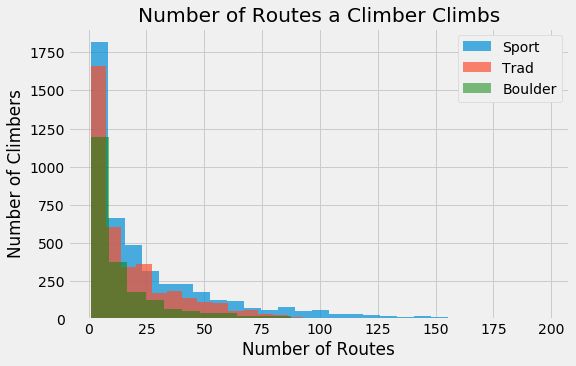

In [448]:
sport_counts = (climbs[(climbs['style'] == 'Lead')
                      & (climbs['type'] == 'Sport')
                      & (climbs['lead_style'] != 'Fell/Hung')]
                .groupby('user_id').count()['route_id'])
trad_counts = (climbs[(climbs['style'] == 'Lead')
                     & (climbs['type'] == 'Trad')
                     & (climbs['lead_style'] != 'Fell/Hung')]
               .groupby('user_id').count()['route_id'])
boulder_counts = (climbs[(climbs['type'] == 'Boulder')]
                  .groupby('user_id').count()['route_id'])

bins = 25
alpha = .7
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(sport_counts, bins=bins, alpha=alpha, label='Sport');
ax.hist(trad_counts, bins=bins, alpha=alpha, label='Trad');
ax.hist(boulder_counts, bins=bins, alpha=.5, color='g', label='Boulder');
ax.set_ylabel('Number of Climbers');
ax.set_xlabel('Number of Routes');
ax.set_title('Number of Routes a Climber Climbs');
ax.legend(loc='upper right', framealpha=1);

plt.savefig('./images/num_climbs.png', bbox_inches='tight')

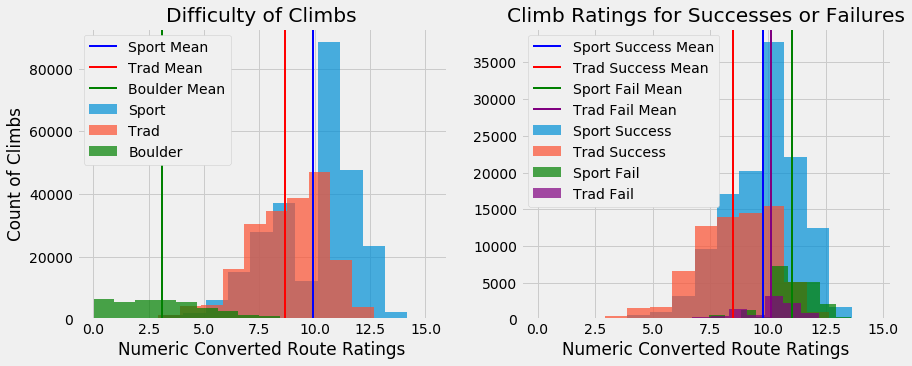

In [449]:
sport_ratings = climbs[climbs['type'] == 'Sport']['num_rating']
trad_ratings = climbs[climbs['type'] == 'Trad']['num_rating']
boulder_ratings = climbs[climbs['type'] == 'Boulder']['num_rating']

bins = 15
alpha = .7
linewidth = 2
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].hist(sport_ratings, bins=bins, alpha=alpha, label='Sport');
ax[0].hist(trad_ratings, bins=bins, alpha=alpha, label='Trad');
ax[0].hist(boulder_ratings, bins=bins, alpha=alpha, color='g', label='Boulder');
ax[0].axvline(np.mean(sport_ratings), color='b', linewidth=linewidth, label='Sport Mean');
ax[0].axvline(np.mean(trad_ratings), color='r', linewidth=linewidth, label='Trad Mean');
ax[0].axvline(np.mean(boulder_ratings), color='g', linewidth=linewidth, label='Boulder Mean');
ax[0].set_title('Difficulty of Climbs');
ax[0].set_ylabel('Count of Climbs');
ax[0].set_xlabel('Numeric Converted Route Ratings');
ax[0].legend(loc='upper left', framealpha=1);

sport_sends = climbs[
    (climbs['style'] == 'Lead')
    & (climbs['type'] == 'Sport')
    & (climbs['lead_style'] != 'Fell/Hung')]['num_rating']
sport_falls = climbs[
    (climbs['style'] == 'Lead')
    & (climbs['type'] == 'Sport')
    & (climbs['lead_style'] == 'Fell/Hung')]['num_rating']
trad_sends = climbs[
    (climbs['style'] == 'Lead')
    & (climbs['type'] == 'Trad')
    & (climbs['lead_style'] != 'Fell/Hung')]['num_rating']
trad_falls = climbs[
    (climbs['style'] == 'Lead')
    & (climbs['type'] == 'Trad')
    & (climbs['lead_style'] == 'Fell/Hung')]['num_rating']

bins = 15
alpha = .7
linewidth = 2
ax[1].hist(sport_sends, bins=bins, alpha=alpha, label='Sport Success');
ax[1].hist(trad_sends, bins=bins, alpha=alpha, label='Trad Success');
ax[1].hist(sport_falls, bins=bins, alpha=alpha, label='Sport Fail', color='g');
ax[1].hist(trad_falls, bins=bins, alpha=alpha, label='Trad Fail', color='purple');
ax[1].axvline(np.mean(sport_sends), color='b', linewidth=linewidth, label='Sport Success Mean');
ax[1].axvline(np.mean(trad_sends), color='r', linewidth=linewidth, label='Trad Success Mean');
ax[1].axvline(np.mean(sport_falls), color='g', linewidth=linewidth, label='Sport Fail Mean');
ax[1].axvline(np.mean(trad_falls), color='purple', linewidth=linewidth, label='Trad Fail Mean');
ax[1].set_title('Climb Ratings for Successes or Failures');
ax[1].set_xlabel('Numeric Converted Route Ratings');
ax[1].legend(loc='upper left', framealpha=1);

plt.savefig('./images/climbs_difficulty.png', bbox_inches='tight')

In [436]:
sport_max = (climbs[(climbs['style'] == 'Lead')
                    & (climbs['type'] == 'Sport')
                    & (climbs['lead_style'] != 'Fell/Hung')][['user_id','num_rating']]
                .groupby('user_id').aggregate(max).rename(columns={'num_rating': 'sport_max'}))
trad_max = (climbs[(climbs['style'] == 'Lead')
                   & (climbs['type'] == 'Trad')
                   & (climbs['lead_style'] != 'Fell/Hung')][['user_id','num_rating']]
                .groupby('user_id').aggregate(max).rename(columns={'num_rating': 'trad_max'}))
boulder_max = (climbs[(climbs['type'] == 'Boulder')][['user_id','num_rating']]
                .groupby('user_id').aggregate(max).rename(columns={'num_rating': 'boulder_max'}))

sport_avg = (climbs[(climbs['style'] == 'Lead')
                    & (climbs['type'] == 'Sport')
                    & (climbs['lead_style'] != 'Fell/Hung')][['user_id','num_rating']]
                .groupby('user_id').mean().rename(columns={'num_rating': 'sport_avg'}))
trad_avg = (climbs[(climbs['style'] == 'Lead')
                   & (climbs['type'] == 'Trad')
                   & (climbs['lead_style'] != 'Fell/Hung')][['user_id','num_rating']]
                .groupby('user_id').mean().rename(columns={'num_rating': 'trad_avg'}))
boulder_avg = (climbs[(climbs['type'] == 'Boulder')][['user_id','num_rating']]
                .groupby('user_id').mean().rename(columns={'num_rating': 'boulder_avg'}))

on = 'user_id'
how = 'outer'
climber_stats = sport_max.merge(trad_max, how=how, left_on=on, right_on=on)
climber_stats = climber_stats.merge(boulder_max, how=how, left_on=on, right_on=on)
climber_stats = climber_stats.merge(sport_avg, how=how, left_on=on, right_on=on)
climber_stats = climber_stats.merge(trad_avg, how=how, left_on=on, right_on=on)
climber_stats = climber_stats.merge(boulder_avg, how=how, left_on=on, right_on=on)

climber_stats['max_sport_trad_diff'] = climber_stats['sport_max'] - climber_stats['trad_max']
climber_stats['avg_sport_trad_diff'] = climber_stats['sport_avg'] - climber_stats['trad_avg']
climber_stats.head()

,sport_max,trad_max,boulder_max,sport_avg,trad_avg,boulder_avg,max_sport_trad_diff,avg_sport_trad_diff
user_id,,,,,,,,
10134,9.3,7.0,NaN,7.260000,6.200000,NaN,2.3,1.060000
10143,12.4,NaN,4.01,9.950000,NaN,4.01,NaN,NaN
10231,13.2,9.3,NaN,11.100000,9.300000,NaN,3.9,1.800000
10270,11.5,10.4,0.01,9.609412,7.917647,0.01,1.1,1.691765
10332,10.3,6.0,NaN,9.150000,6.000000,NaN,4.3,3.150000


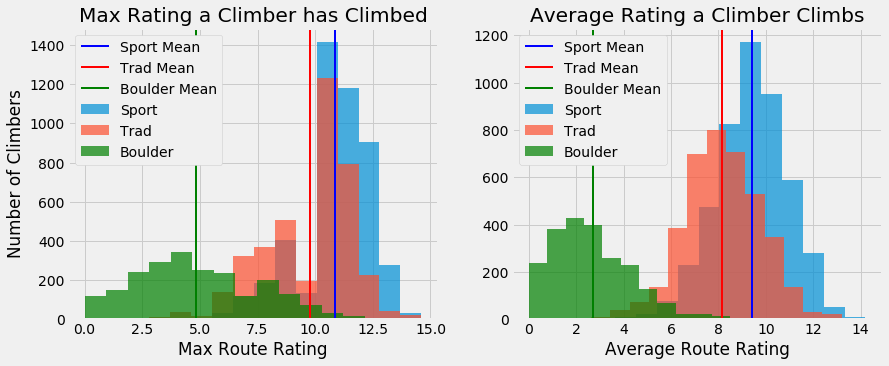

In [460]:
bins = 15
alpha = .7
lw = 2
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].hist(climber_stats['sport_max'], bins=bins, alpha=alpha, label='Sport');
ax[0].hist(climber_stats['trad_max'], bins=bins, alpha=alpha, label='Trad');
ax[0].hist(climber_stats['boulder_max'], bins=bins, alpha=alpha, color='g', label='Boulder');
ax[0].axvline(np.mean(climber_stats['sport_max']), color='b', linewidth=lw, label='Sport Mean');
ax[0].axvline(np.mean(climber_stats['trad_max']), color='r', linewidth=lw, label='Trad Mean');
ax[0].axvline(np.mean(climber_stats['boulder_max']),color='g',linewidth=lw,label='Boulder Mean');
ax[0].set_ylabel('Number of Climbers');
ax[0].set_xlabel('Max Route Rating');
ax[0].set_title('Max Rating a Climber has Climbed');
ax[0].legend(loc='upper left', framealpha=1);

ax[1].hist(climber_stats['sport_avg'], bins=bins, alpha=alpha, label='Sport');
ax[1].hist(climber_stats['trad_avg'], bins=bins, alpha=alpha, label='Trad');
ax[1].hist(climber_stats['boulder_avg'], bins=bins, alpha=alpha, color='g', label='Boulder');
ax[1].axvline(np.mean(climber_stats['sport_avg']), color='b', linewidth=lw, label='Sport Mean');
ax[1].axvline(np.mean(climber_stats['trad_avg']), color='r', linewidth=lw, label='Trad Mean');
ax[1].axvline(np.mean(climber_stats['boulder_avg']),color='g',linewidth=lw,label='Boulder Mean');
ax[1].set_xlabel('Average Route Rating');
ax[1].set_title('Average Rating a Climber Climbs');
ax[1].legend(loc='upper left', framealpha=1);

plt.savefig('./images/climber_stats.png', bbox_inches='tight')

The mean difference in max rating is 1.24.
The mean difference in average rating is 1.39.


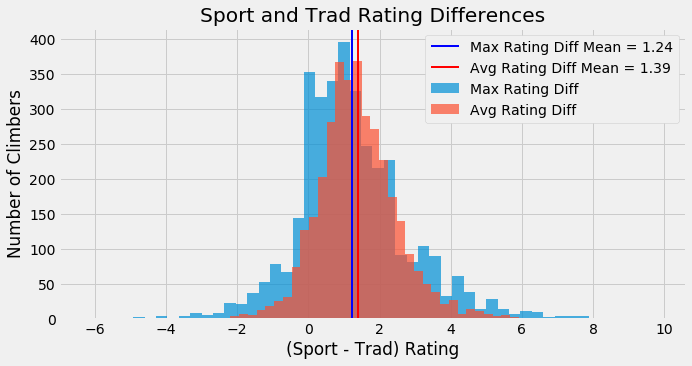

In [459]:
bins = 50
alpha = .7
lw = 2
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(climber_stats['max_sport_trad_diff'],
        bins=bins, alpha=alpha, label='Max Rating Diff');
ax.axvline(np.mean(climber_stats['max_sport_trad_diff']),
           color='b', linewidth=lw,
           label=f"Max Rating Diff Mean = {np.mean(climber_stats['max_sport_trad_diff']):2.2f}");
ax.hist(climber_stats['avg_sport_trad_diff'],
        bins=bins, alpha=alpha, label='Avg Rating Diff');
ax.axvline(np.mean(climber_stats['avg_sport_trad_diff']),
           color='r', linewidth=lw,
           label=f"Avg Rating Diff Mean = {np.mean(climber_stats['avg_sport_trad_diff']):2.2f}");
ax.set_ylabel('Number of Climbers');
ax.set_xlabel('(Sport - Trad) Rating');
ax.set_title('Sport and Trad Rating Differences');
ax.legend(loc='upper right', framealpha=1);

plt.savefig('./images/sport_trad_diff.png', bbox_inches='tight')

print(f"The mean difference in max rating is {np.mean(climber_stats['max_sport_trad_diff']):2.2f}.")
print(f"The mean difference in average rating is {np.mean(climber_stats['avg_sport_trad_diff']):2.2f}.")